## Task 3 : Exploratory Data Analysis - Retail 

### Name : Md . Muntasirul Hoque


### Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’.

● As a business manager, try to find out the weak areas where you can work to make more profit.

● Dataset: https://bit.ly/3i4rbWl

● Beginner Level - Create dashboards. Screen-record along with audio explaining the charts and interpretations.

In [1]:
# Lets import the important librarues which we will use in throughout the analysis. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Lets import the dataset from local drive and disply it.

dataset = pd.read_csv(r"SampleSuperstore.csv")
dataset.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
# Lets check the shape of the imported dataset.
dataset.shape
print(f"Dataset have {dataset.shape[0]} rows and {dataset.shape[1]} features")

Dataset have 9994 rows and 13 features


In [4]:
# Displaying the Feature names
dataset.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [5]:
# Lets check the information of dataset using info() which shows the null values counts feature names and Daata Type of every feature.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
# As we are doing EDA Part of the problem, We have to check for the null values if any feature have.
dataset.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

As per above result we can say that there are no null values in any features.

<AxesSubplot:xlabel='Sales'>

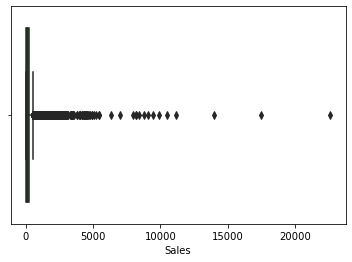

In [7]:
# Lets check the outliers for every features using boxplots.
sns.boxplot(x=dataset["Sales"],color='green')

As we can see from the above plot outliers are present in the Sales column, We will try to remove the outliers by IQR method.

In [8]:
# Lets do the treatment for the outliers in Sales column using IQR Method.
# IQR measures the statistical dispersion of the data values in a measure of overall distribution.
for i in["Sales"]:
    q3,q1=np.percentile(dataset.loc[:,i],[75,25])
    iqr=q3-q1
    max=q3+(1.5*iqr)
    min=q1-(1.5*iqr)
    
    dataset.loc[dataset[i]<min,i]=np.nan
    dataset.loc[dataset[i]>max,i]=np.nan

In [9]:
dataset['Sales']

0       261.960
1           NaN
2        14.620
3           NaN
4        22.368
         ...   
9989     25.248
9990     91.960
9991    258.576
9992     29.600
9993    243.160
Name: Sales, Length: 9994, dtype: float64

In [10]:
# Lets replace the nan values with the average values in Sales column.

dataset["Sales"].fillna(dataset["Sales"].mean(),inplace=True)

In [11]:
dataset["Sales"]

0       261.960000
1        92.864853
2        14.620000
3        92.864853
4        22.368000
           ...    
9989     25.248000
9990     91.960000
9991    258.576000
9992     29.600000
9993    243.160000
Name: Sales, Length: 9994, dtype: float64

In [12]:
dataset['Sales'].isnull().sum()

0

<AxesSubplot:xlabel='Sales'>

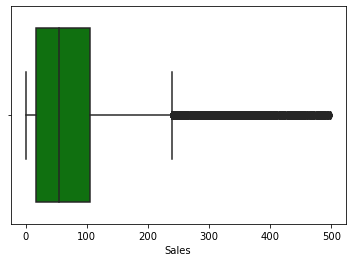

In [13]:
sns.boxplot(x=dataset["Sales"],color="Green")

<AxesSubplot:xlabel='Profit'>

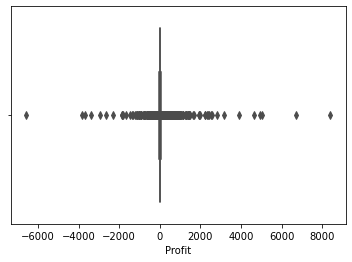

In [14]:
# Lets check outliers in Profit column
sns.boxplot(x=dataset['Profit'],color='Red')

Yes Profit colums also having the outliers in to it. Lets make treatment for that also.

In [15]:
for i in ['Profit']:
    q3, q1 = np.percentile(dataset.loc[: , i],[75,25])
    iqr = q3 - q1
    max = q3 + (1.5 * iqr)
    min = q1 - (1.5 * iqr)
        
    dataset.loc[dataset[i] < min, i] = np.nan
    dataset.loc[dataset[i] > max, i] = np.nan

In [16]:
# Lets replace the nan values with the average values in Profit column.

dataset['Profit'].fillna(dataset['Profit'].mean(), inplace = True)

<AxesSubplot:xlabel='Profit'>

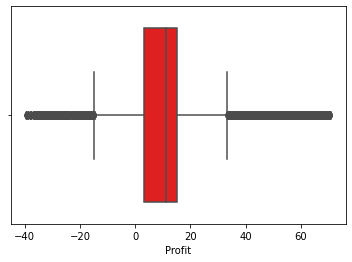

In [17]:
#Lets makesure if outliers are removed or not.
sns.boxplot(x = dataset['Profit'],color="Red")

<AxesSubplot:xlabel='Quantity'>

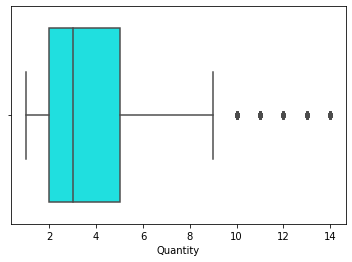

In [18]:
# Lets check outliers in Quantity Column.
sns.boxplot(x = dataset['Quantity'],color='cyan')

Yes, Quantity column also have outliers in to it 

In [19]:
for i in ['Quantity']:
    q3, q1 = np.percentile(dataset.loc[: , i],[75,25])
    iqr = q3 - q1
    max = q3 + (1.5 * iqr)
    min = q1 - (1.5 * iqr)
    
    dataset.loc[dataset[i] < min, i] = np.nan
    dataset.loc[dataset[i] > max, i] = np.nan

In [20]:
dataset['Quantity'].fillna(dataset['Quantity'].mean(), inplace = True)

<AxesSubplot:xlabel='Quantity'>

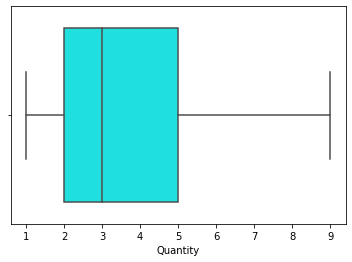

In [21]:
sns.boxplot(x = dataset['Quantity'],color="cyan")

<AxesSubplot:xlabel='Discount'>

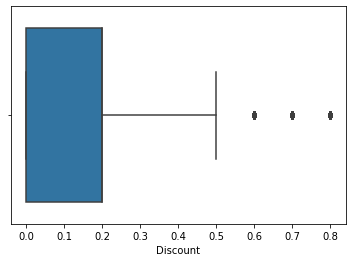

In [22]:
sns.boxplot(x = dataset['Discount'])

In [23]:
for i in ['Discount']:
    q3, q1 = np.percentile(dataset.loc[: , i],[75,25])
    iqr = q3 - q1
    max = q3 + (1.5 * iqr)
    min = q1 - (1.5 * iqr)
    
    dataset.loc[dataset[i] < min, i] = np.nan
    dataset.loc[dataset[i] > max, i] = np.nan

In [24]:
dataset['Discount'].fillna(dataset['Discount'].mean(), inplace = True)

<AxesSubplot:xlabel='Discount'>

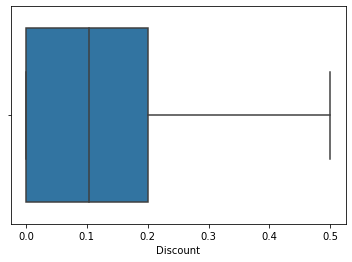

In [25]:
sns.boxplot(x = dataset['Discount'])

We have sucessfully removed all of the outliers from the above columns.

In [26]:
# Lets display total number of stores in USA
print(f"There are total {int(dataset['Country'].value_counts())} Retail Super stores in USA")

There are total 9994 Retail Super stores in USA


In [27]:
#Calculation of cost price for every Super Stores
dataset['Cost'] = dataset['Sales'] - dataset['Profit']
dataset['Cost']

0       220.046400
1        81.260767
2         7.748600
3        81.260767
4        19.851600
           ...    
9989     21.145200
9990     76.326800
9991    239.182800
9992     16.280000
9993    231.555914
Name: Cost, Length: 9994, dtype: float64

In [28]:
#Calculation of Profit Percentage
dataset['Profit%'] = (dataset['Profit']/dataset['Cost'])*100
dataset['Profit%']

0       19.047619
1       14.280060
2       88.679245
3       14.280060
4       12.676056
          ...    
9989    19.402985
9990    20.481928
9991     8.108108
9992    81.818182
9993     5.011354
Name: Profit%, Length: 9994, dtype: float64

In [29]:
dataset.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Cost', 'Profit%'],
      dtype='object')

Text(0.5, 1.0, 'Correlation between the Features')

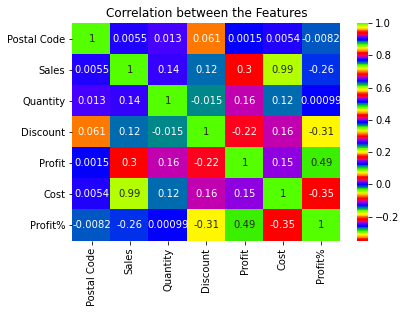

In [30]:
# Lets generate the correlation table and visualise it using the Heatmap

corr = dataset.corr()
sns.heatmap(corr,annot=True,cmap='prism')
plt.title("Correlation between the Features")

As per the above heatmap we can conclude that,
- Sales with Profit and Cost is highly correlated

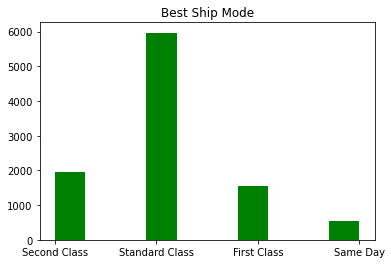

In [31]:
# Lets Create Histogram to find best Shipping Mode
dataset['Ship Mode'].value_counts()
plt.hist(dataset['Ship Mode'],color='g')
plt.title('Best Ship Mode')
plt.show()

As per above histogram we can say that the "Standard Class" Ship Mode is mostly Preferred while "Same Day" Ship Mode is less Preferred by the customers.

In [32]:
#Lets check the Number of people in Each Category of Customer Segements
dataset['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

Text(0.5, 1.0, 'Customer Segments')

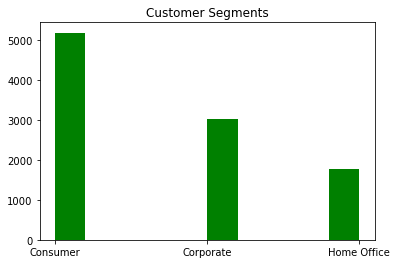

In [33]:
#Plotting to Find Which Customer Segments Buys the Products Most

plt.hist(dataset['Segment'],color='Green')
plt.title('Customer Segments')

As per above histogram we can say that the heighest buyers from Customer Segments are type "Consumer" while "Home Office" Customers are spending all time low as compare to other two categories.

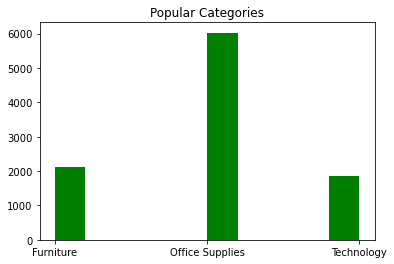

In [34]:
# Plotting to Find Which Type of Product is Preferred Most

plt.hist(dataset['Category'], color='Green')
plt.title('Popular Categories')
plt.show()

As per the above histogram we can say that the heighest investment from Customers are in "Office Supplies" while "Furniture" and "Technology" Products are less but equally populer to Customers investment compare to "Office Supplies".

Text(0.5, 1.0, 'Region-Wise Products Purchased')

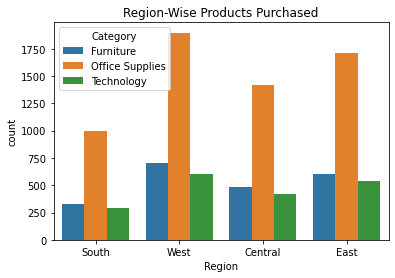

In [35]:
# Region Wise Sales Analysis
sns.countplot(x=dataset['Region'], hue= dataset['Category'])
plt.title('Region-Wise Products Purchased')

As per the above countplot, we can say that the heighest order of "Furniture","Office Supplies","Technology" in the the "West" Region is highly Ordered, While in the "South" Region all of the three categoris are less ordered.

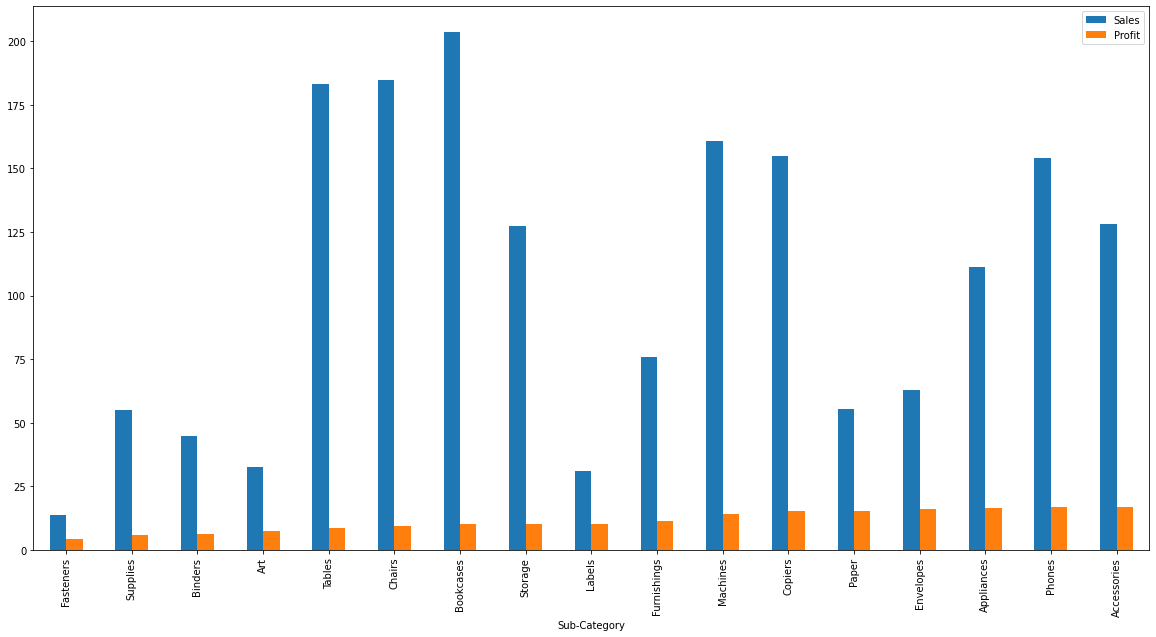

In [36]:
# Lets make Analysis of Profit and Sale Price Of every Subcategorical Products

data_s_cat = dataset.groupby(['Sub-Category'])[['Sales', 'Discount', 'Profit']].mean()
data_s_cat.sort_values('Profit')[['Sales','Profit']].plot(kind='bar',figsize= (20,10),label=['Avgerage Sales Price($)','Profit($)'])
plt.show()

As per the above graph, we can say that highest profitable subcategory is "Paper" (i.e. Less sales but highest profit compare to every product) and the least Profitable Subcategory Product is Bookcases (i.e. Highest Sales but lowest profit as compared to all other profit).

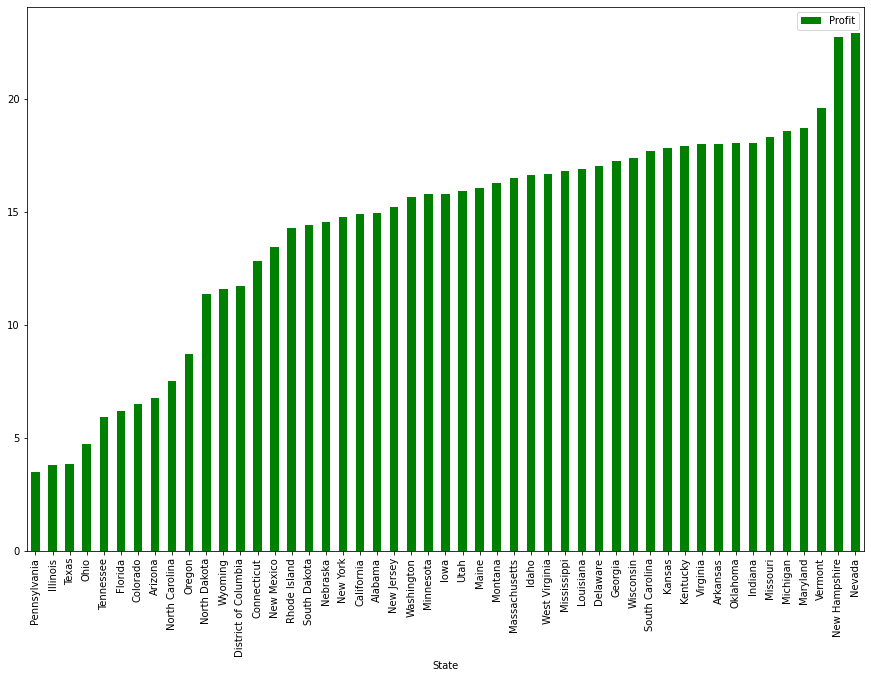

In [37]:
# Analysis of States by Profit

states_profit = dataset.groupby(['State'])[['Profit']].mean()
states_profit.sort_values('Profit').plot(kind='bar', color = 'green',figsize= (15,10),label=['Average Profit($)'])
plt.show()

As per above bar chart we can say that "Nevada" is the highest profit maker state while "Pennsylvania" is the Lowest Profit Maker State in USA.

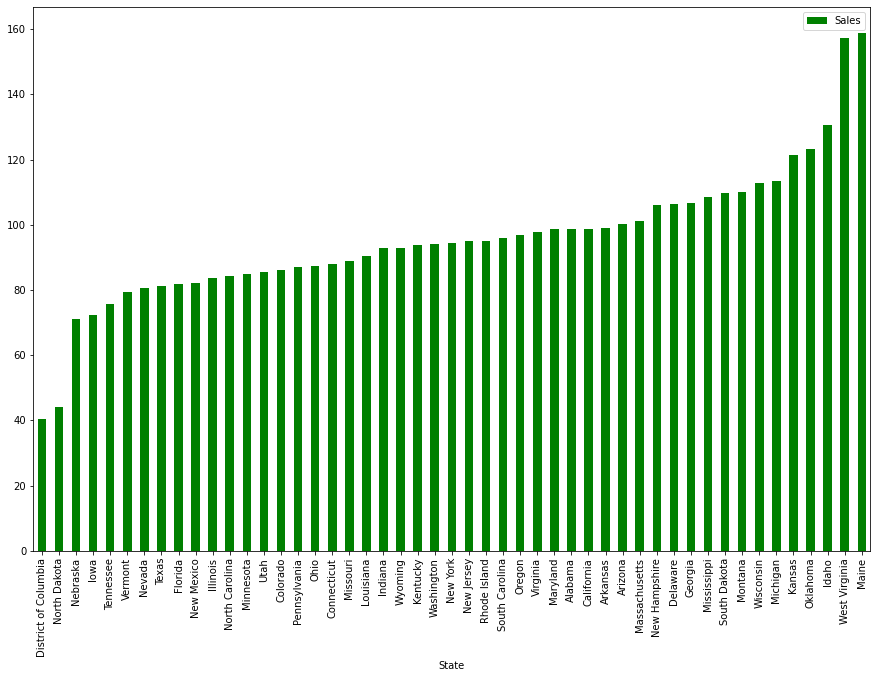

In [38]:
# Analysis of States by Sales.
states_sales = dataset.groupby(['State'])[['Sales']].mean()
states_sales.sort_values('Sales').plot(kind='bar',figsize= (15,10), color="green" , label=['Average Sales Price($)'])
plt.show()

As per the above bar chart we can say that, Highest sales of Products are made in "Maine" State while Lowest sales registered at "District of Columbia"

In [39]:
# Top 10 Cities in Sales and Profit

top_10_sales = dataset.groupby("City").Sales.sum().nlargest(n = 10)
top_10_prof = dataset.groupby("City").Profit.sum().nlargest(n = 10)

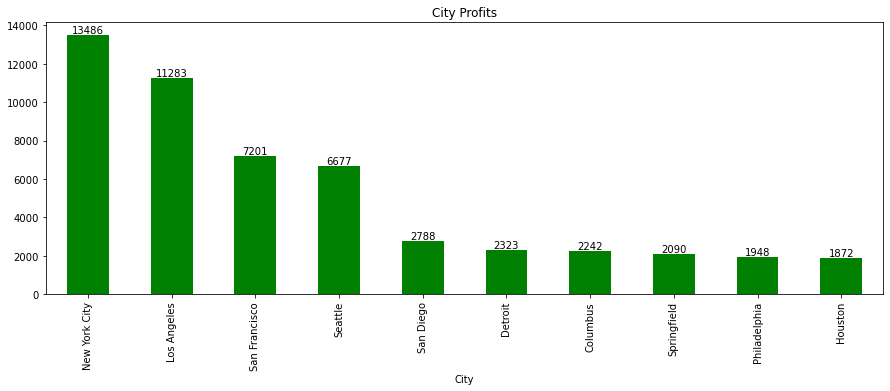

In [40]:
# Top 10 State Wise Profit Analysis

ax =top_10_prof.plot(kind ='bar', figsize = (15, 5), color='green', fontsize = 10)
ax.set(title='City Profits')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + (p.get_width() / 2), y = height + 100, s = '{:.0f}'.format(height), ha = 'center')
plt.show()

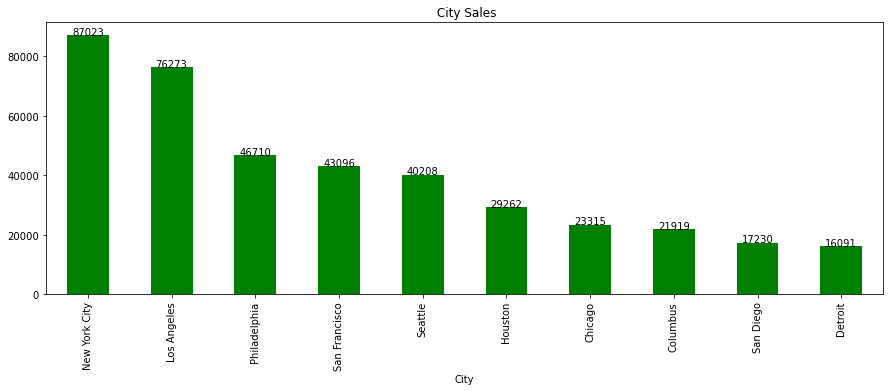

In [41]:
#Top 10 City Wise Sales Analysis

ax =top_10_sales.plot(kind ='bar', figsize =(15,5),color='green', fontsize =10)
ax.set(title=' City Sales')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + (p.get_width() / 2), y = height + 100, s = '{:.0f}'.format(height), ha = 'center')
plt.show()

<AxesSubplot:ylabel='Sub-Category'>

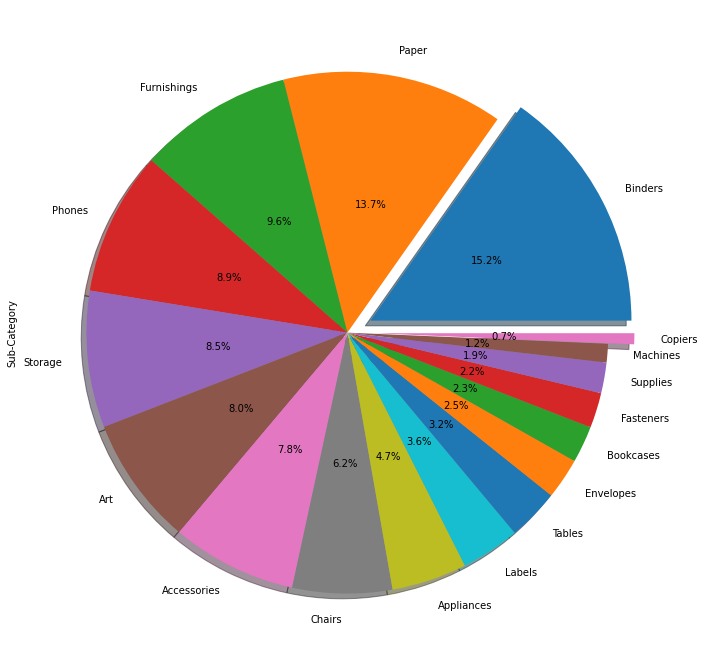

In [42]:
# Subcategory-wise Product Analysis

plt.figure(figsize=(12,12))
explode = (0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1)

dataset['Sub-Category'].value_counts().plot.pie(explode=explode,autopct = '%1.1f%%', pctdistance = 0.5, shadow=True)

As per the above pie chart we can say that, "Binder" is ordered "15.2%" which is highest orderd as compared to other products while "Copiers" are least ordered with "0.7%" by customers.

<AxesSubplot:ylabel='Sales'>

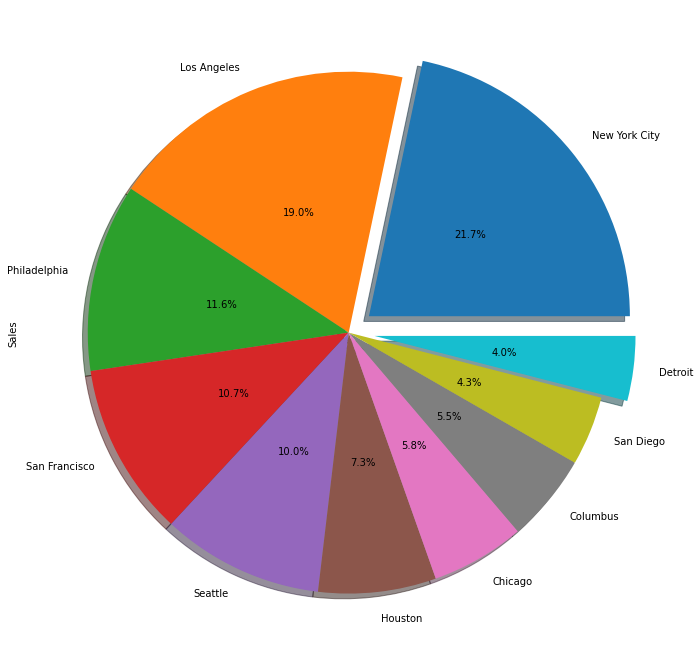

In [43]:
#Top 10 City Wise Sales Analysis

plt.figure(figsize=(12,12))
explode = (0.1,0,0,0,0,0,0,0,0,0.1)

top_10_sales.plot.pie(explode=explode,autopct = '%1.1f%%', pctdistance = 0.5, shadow=True)

<AxesSubplot:ylabel='Profit'>

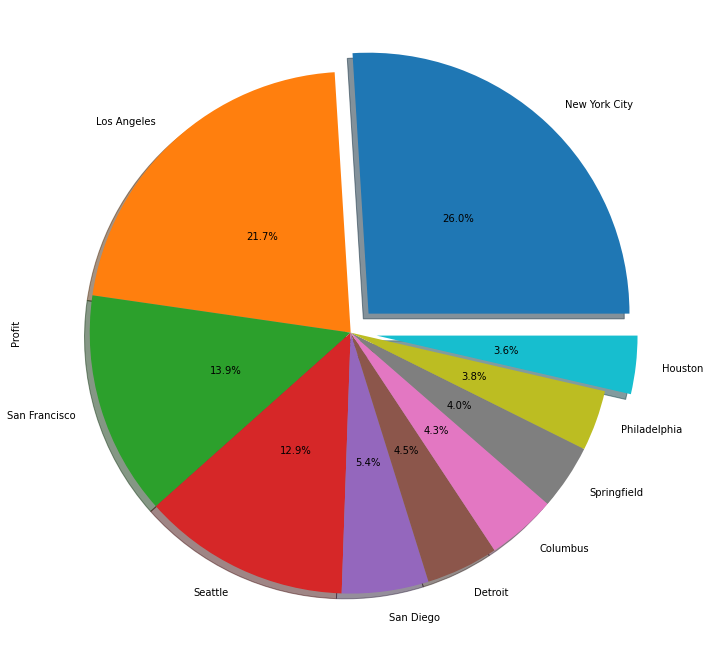

In [44]:
#Top 10 City Wise Profit Analysis

plt.figure(figsize=(12,12))
explode = (0.1,0,0,0,0,0,0,0,0,0.1)

top_10_prof.plot.pie(explode=explode,autopct = '%1.1f%%', pctdistance = 0.5, shadow=True)